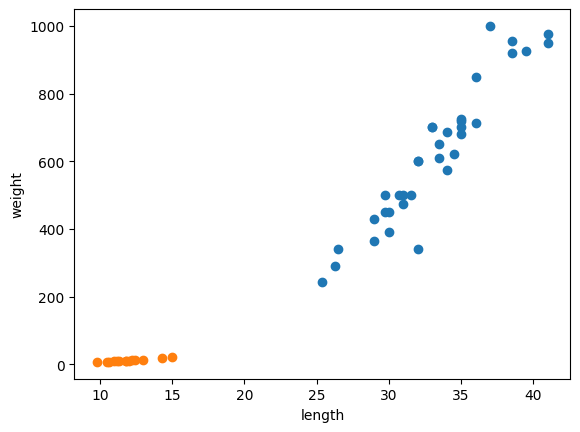

fish_feature : [[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
fish_target : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

-- 생선이 도미인지 빙어인지 판단합니다. --

생선의 길이 : 15
생선의 무게 : 80

입력하신 생선은 빙어입니다.


In [10]:
# 생선 분류 문제

# 데이터 준비

  # 도미 35마리와 빙어 14마리의 길이 리스트와 무게 리스트
  # 데이터에서 훈련에 필요한 값들 '길이'와 '무게'를 특성이라고 부른다.

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 한 그래프에도미와 빙어를 표시하기

import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)   # 파란색이 도미
plt.scatter(smelt_length, smelt_weight)   # 주황색이 빙어
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# ** k-최근접 이웃 알고리즘 **

	#  - 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다.
	#  - 근묵자흑과 같이 주위의 데이터로 현재 데이터를 판단한다.

# [길이,무게] 형태로 도미 리스트와 빙어 리스트를 하나로 합치기

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_feature = [[l,w] for l,w in zip(length,weight)] # zip() 함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환한다.
print("fish_feature :", fish_feature)

# 정답 리스트 만들기

  # - 도미는 1
  # - 빙어는 0

  # 리스트 내용 : 도미는 35마리이고 빙어는 14마리이므로, 1이 35번 있고 0이 14번 있다.

fish_target = [1] * 35 + [0] * 14
print("fish_target :", fish_target)

# 훈련하기

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_feature, fish_target) # fit() 메소드는 모델에 데이터를 전달해 규칙을 학습하는 훈련 역할을 한다.
kn.score(fish_feature, fish_target) # score() 메소드는 모델이 잘 훈련되었는지 평가해서 정확도를 반환한다. (0~1 사이의 값)

# 가장 가까운 데이터 n개를 사용해 예측하는 방법

n = 1

knN = KNeighborsClassifier(n_neighbors=n)
knN.fit(fish_feature, fish_target)
knN.score(fish_feature, fish_target)
knN.predict([[30, 600]])

# 판단 프로그램

print("\n-- 생선이 도미인지 빙어인지 판단합니다. --\n")
input_l = input("생선의 길이 : ")
input_w = input("생선의 무게 : ")

result = kn.predict([[int(input_l), int(input_w)]]);

if result[0] == 1 : print("\n입력하신 생선은 도미입니다.")
else : print("\n입력하신 생선은 빙어입니다.")


#TensorFlow

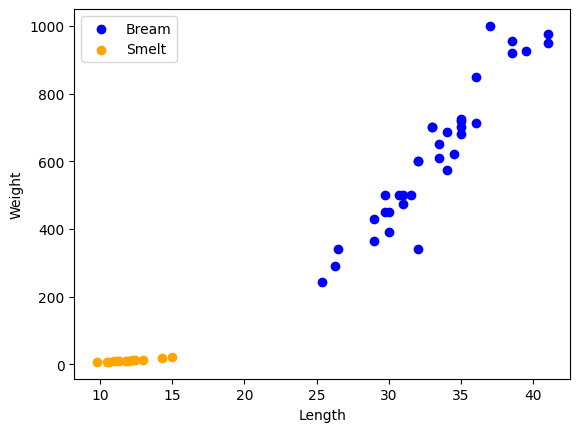

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0011      
모델 정확도: 100.00%

-- 생선이 도미인지 빙어인지 판단합니다. --

생선의 길이 : 50
생선의 무게 : 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

입력하신 생선은 빙어입니다.


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 결합
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 특성 리스트 준비
fish_feature = np.array([[l, w] for l, w in zip(length, weight)])

# 정답 리스트 준비
fish_target = np.array([1] * 35 + [0] * 14)

# 데이터 시각화
plt.scatter(bream_length, bream_weight, color='blue', label='Bream')
plt.scatter(smelt_length, smelt_weight, color='orange', label='Smelt')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

# 모델 정의: 간단한 신경망 모델
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),  # 두 개의 입력 특성 (길이, 무게)
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 이진 분류 (도미 = 1, 빙어 = 0)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(fish_feature, fish_target, epochs=100, verbose=0) # verbose=0 : epochs 출력 안함

# 모델 평가
loss, accuracy = model.evaluate(fish_feature, fish_target)
print(f"모델 정확도: {accuracy * 100:.2f}%")

# 예측하기
n = 1  # 가장 가까운 데이터 한 개를 기준으로 예측

print("\n-- 생선이 도미인지 빙어인지 판단합니다. --\n")

input_length = int(input("생선의 길이 : "))
input_weight = int(input("생선의 무게 : "))

# 입력을 numpy 배열로 변환하여 예측
prediction = model.predict(np.array([[input_length, input_weight]]))

# 예측 결과 출력

  # 모델은 이진 분류 문제를 해결하는데, 출력층에서는 sigmoid 활성화 함수가 사용되어 0과 1 사이의 값을 출력합니다:
    # - 0에 가까운 값: 빙어(0)
    # - 1에 가까운 값: 도미(1)

if prediction[0] > 0.5: print("\n입력하신 생선은 도미입니다.")
else: print("\n입력하신 생선은 빙어입니다.")
